Problem Statement: [Image processing #2](https://docs.google.com/document/d/1CHvXTk-gR-x6hwXoPXypSl36gtzdNfzNR5dLfHuUjas/edit#)

## Loading the required libraries and packages

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

## Loading the MNIST dataset and creating the training and test arrays

In [ ]:
(X_train, y_train),(X_test, y_test)=mnist.load_data()
print(X_train.shape,X_test.shape)
print(X_train[1].shape)

## Display data

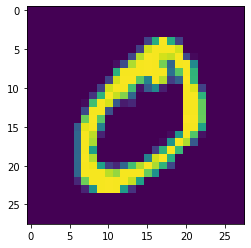

In [ ]:
plt.imshow(X_train[1])
plt.show()

## Data Preparation

In [ ]:
X_train=X_train.reshape((X_train.shape[0],28,28,1)).astype('float32')
X_test=X_test.reshape((X_test.shape[0],28,28,1)).astype('float32')
X_train=X_train/255
X_test=X_test/255
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
num_classes=y_test.shape[1]
print(X_train.shape)
print(X_train.shape)
print(num_classes)

(60000, 28, 28, 1)
(60000, 28, 28, 1)
10


## Building the CNN model

In [ ]:
cnn_model=Sequential()
cnn_model.add(Conv2D(32,5,activation="relu",input_shape=(28,28,1)))
cnn_model.add(MaxPooling2D((2,2)))
cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())
cnn_model.add(Dense(128,activation="relu"))
cnn_model.add(Dense(10,activation = 'softmax'))

## Compiling the CNN model

In [ ]:
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

## Fitting the model

Eval

In [ ]:
cnn_model.fit(X_train, y_train, batch_size=150, epochs=5)

Epoch 1/5
400/400 [==============================] - 28s 69ms/step - loss: 0.5201 - accuracy: 0.8450
Epoch 2/5
400/400 [==============================] - 28s 70ms/step - loss: 0.1024 - accuracy: 0.9695
Epoch 3/5
400/400 [==============================] - 27s 68ms/step - loss: 0.0685 - accuracy: 0.9793
Epoch 4/5
400/400 [==============================] - 27s 68ms/step - loss: 0.0514 - accuracy: 0.9844
Epoch 5/5
400/400 [==============================] - 27s 68ms/step - loss: 0.0433 - accuracy: 0.9861


In [ ]:
results=cnn_model.evaluate(X_test,y_test)
print("test loss",results[0],"\ntest acc:", results[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.0341 - accuracy: 0.9886
test loss 0.034126799553632736 
test acc: 0.9886000156402588
